# Graph properties

## Setup

In [ ]:
!pip install networkx==2.5 
!pip install matplotlib==3.2.2 
!pip install pandas==1.1.3 
!pip install scipy==1.6.2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
import networkx.algorithms.community as nx_comm

%matplotlib inline

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

## Plot utils

In [ ]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

In [ ]:
# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

## Shortest Path

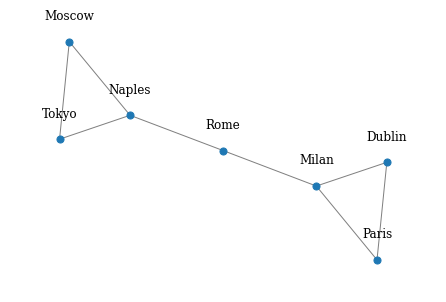

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])
draw_graph(G, node_names=nodes)

In [ ]:
path = nx.shortest_path(G,source=1,target=7)
' -> '.join([nodes[p] for p in path])

'Dublin -> Milan -> Rome -> Naples -> Tokyo'

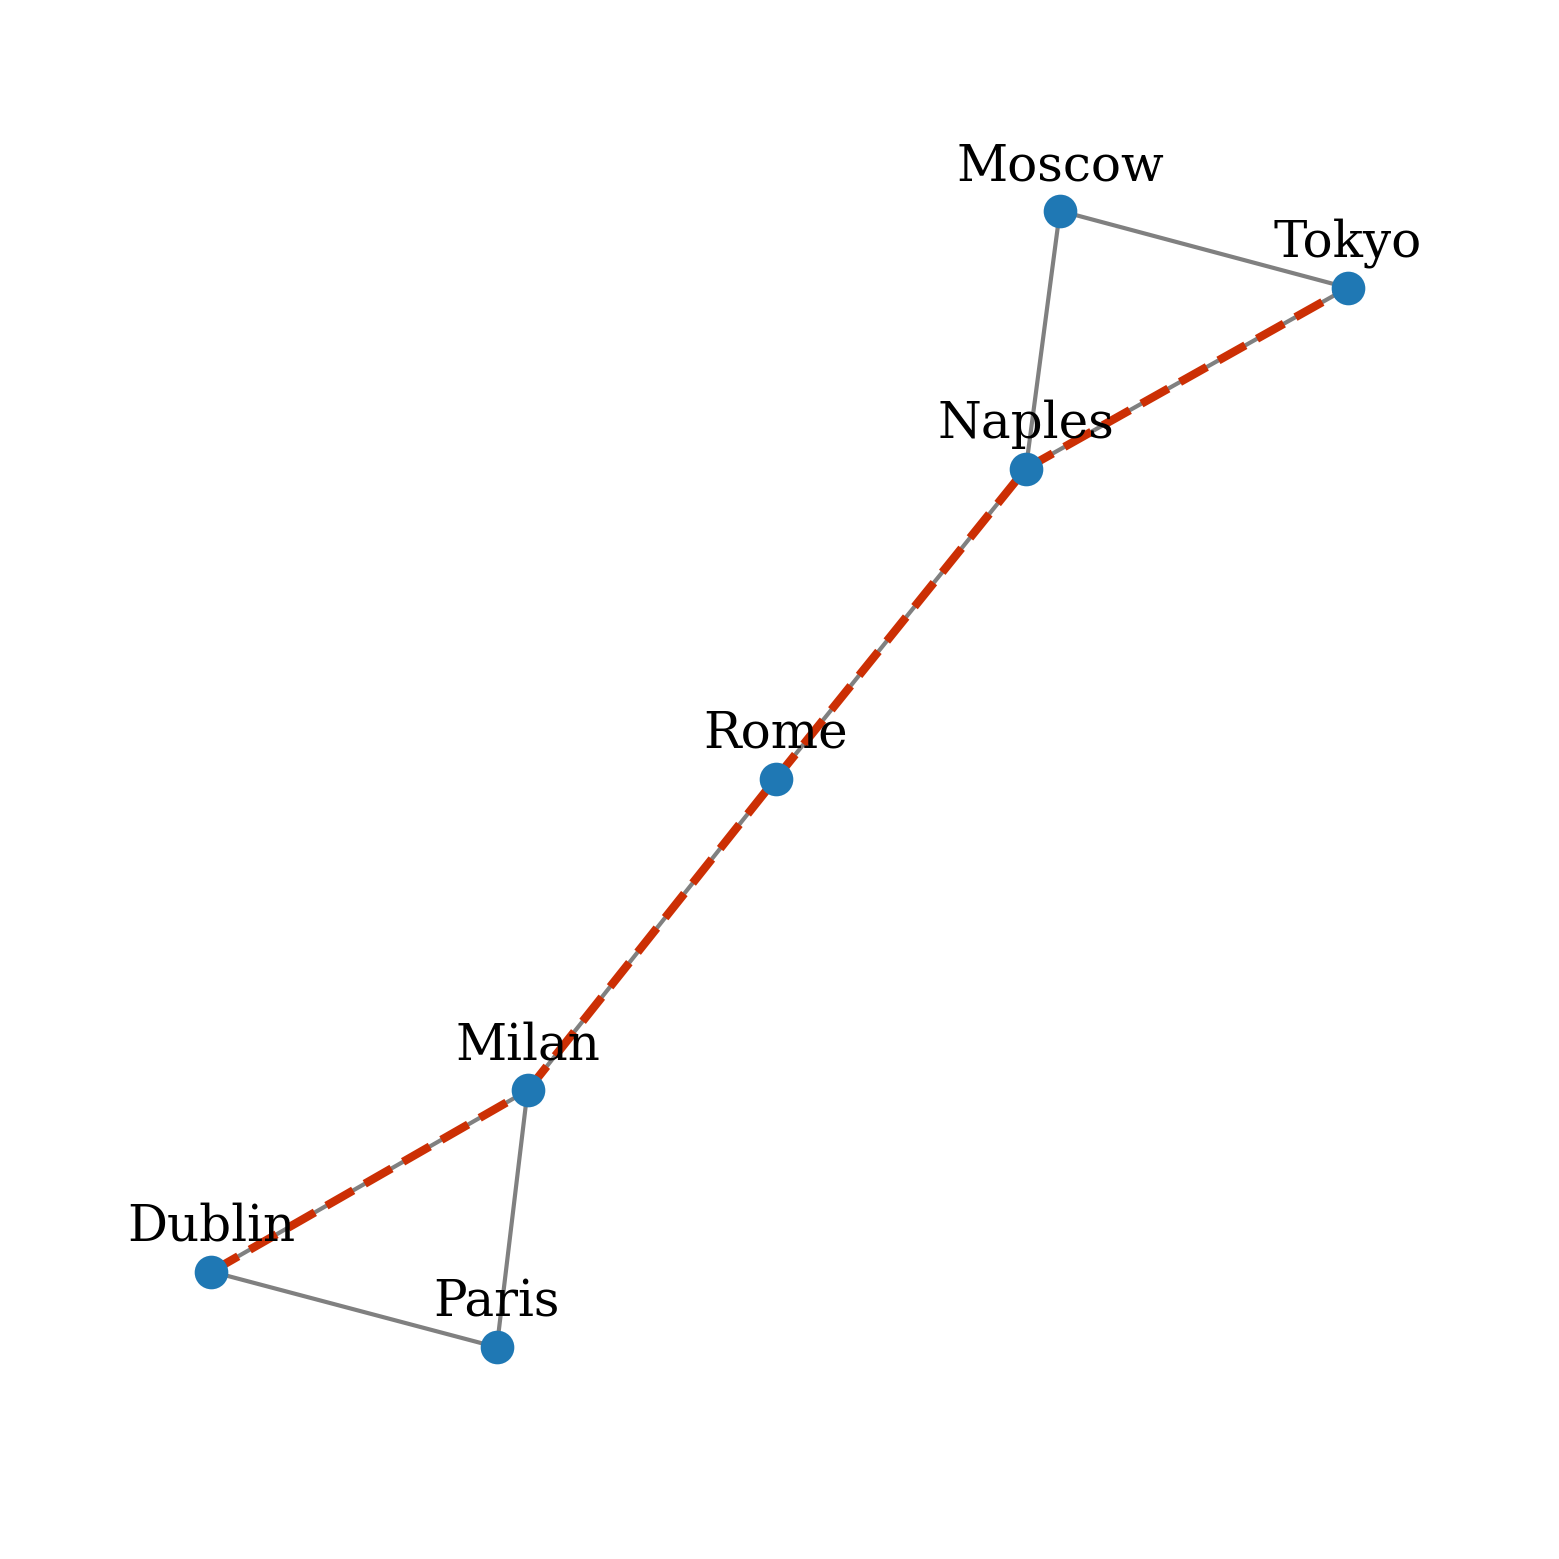

In [ ]:
draw_enhanced_path(G, path, node_names=nodes, filename='shortest_path.png')

## Characteristic path length

The characteristic path length is defined as the average of all the shortest path lengths between all possible pair of nodes. This is one of the most commonly used measures of how efficiently information is spread across a network. Networks having shorter characteristic path lengths promote the quick transfer of information and reduce costs.

In [ ]:
nx.average_shortest_path_length(G)

2.1904761904761907

However, this metric cannot be always defined since it is not possible to compute a path among all the nodes in disconnected graphs. For this reason, network efficiency is also widely used.

## Efficiency

Global efficiency is the average of the inverse shortest path length for all pairs of nodes. Such a metric can be seen as a measure of how efficiently information is exchanged across a network. Efficiency is at a maximum when a graph is fully connected, while it is minimal for completely disconnected graphs. Intuitively, the shorter the path, the lower the measure.

In [ ]:
print(nx.global_efficiency(G))

0.611111111111111


The local efficiency of a node can be computed by considering only the neighborhood of the node in the calculation, without the node itself.

In [ ]:
print(nx.local_efficiency(G))

0.6666666666666667


In a fully connected graph, each node can be reached from any other node in the graph, and information is exchanged rapidly across the network. However, in a circular graph, several nodes should instead be traversed to reach the target node, making it less efficient.

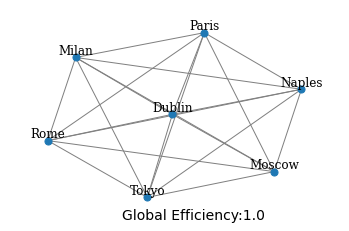

In [ ]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

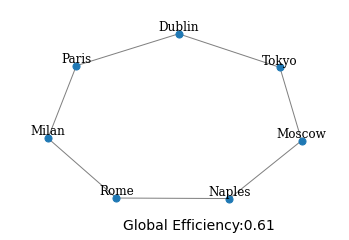

In [ ]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

Integration metrics well describe the connection among nodes. However, more information about the presence of groups can be extracted by considering segregation metrics.

## Segregation

### Clustering coefficient

The clustering coefficient is a measure of how much nodes cluster together. It is defined as the fraction of triangles (complete subgraph of three nodes and three edges) around a node and is equivalent to the fraction of the node's neighbors that are neighbors of each other.

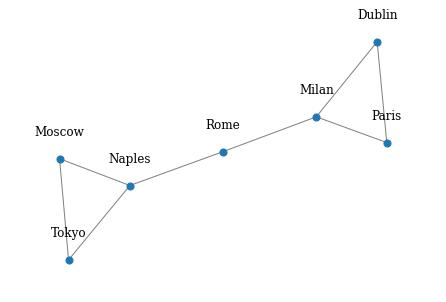

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])
draw_graph(G, node_names=nodes)

A global clustering coefficient is computed in networkx using the following command:

In [ ]:
nx.average_clustering(G)

0.6666666666666667

The local clustering coefficient is computed in networkx using the following command:

In [ ]:
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

In the following graph, two clusters of nodes can be easily identified. By computing the clustering coefficient for each single node, it can be observed that Rome has the lowest value. Tokyo and Moscow, as well as Paris and Dublin, are instead very well connected within their respective groups (notice the size of each node is drawn proportionally to each node's clustering coefficient).

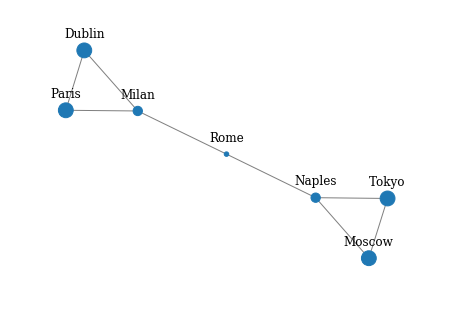

In [ ]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

### Transitivity

A common variant of the clustering coefficient is known as transitivity. This can simply be defined as the ratio between the observed number of closed triplets (complete subgraph with three nodes and two edges) and the maximum possible number of closed triplets in the graph. Transitivity can be computed using networkx, as follows:

In [ ]:
nx.transitivity(G)

0.5454545454545454

### Modularity

Modularity was designed to quantify the division of a network in aggregated sets of highly interconnected nodes, commonly known as modules, communities, groups, or clusters. The main idea is that networks having high modularity will show dense connections within the module and sparse connections between modules.

Consider a social network such as Reddit: members of communities related to video games tend to interact much more with other users in the same community, talking about recent news, favorite consoles, and so on. However, they will probably interact less with users talking about fashion. Differently from many other graph metrics, modularity is often computed by means of optimization algorithms.

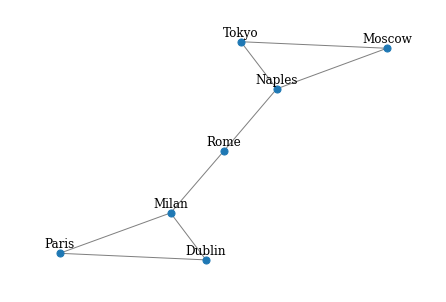

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])
draw_graph(G, node_names=nodes)

Modularity in networkx is computed using the modularity function of the networkx.algorithms.community module, as follows:

In [ ]:
# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

0.3671875


In [ ]:
# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875


## Centrality

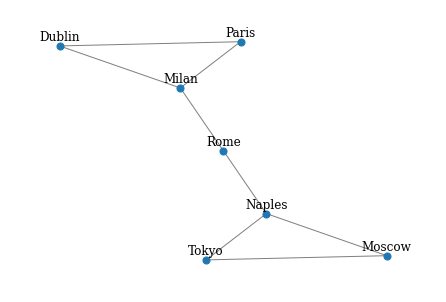

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])
draw_graph(G, node_names=nodes)

One of the most common and simple centrality metrics is the degree centrality metric. This is directly connected with the degree of a node, measuring the number of incident edges on a certain node. Intuitively, the more a node is connected to an other node, the more its degree centrality will assume high values. Note that, if a graph is directed, the in-degree centrality and out-degree centrality will be considered for each node, related to the number of incoming and outcoming edges, respectively. Degree centrality is computed in networkx by using the following command:

In [ ]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


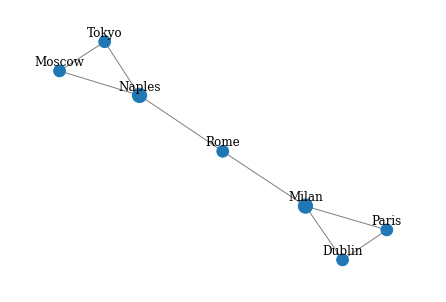

In [ ]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

The closeness centrality metric attempts to quantify how much a node is close (well connected) to other nodes.

In [ ]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Closeness centrality,0.4,0.4,0.545455,0.6,0.545455,0.4,0.4


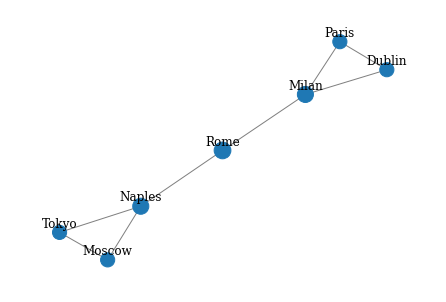

In [ ]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

The betweenness centrality metric evaluates how much a node acts as a bridge between other nodes. Even if poorly connected, a node can be strategically connected, helping to keep the whole network connected.

In [ ]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Betweenness centrality,0.0,0.0,0.533333,0.6,0.533333,0.0,0.0


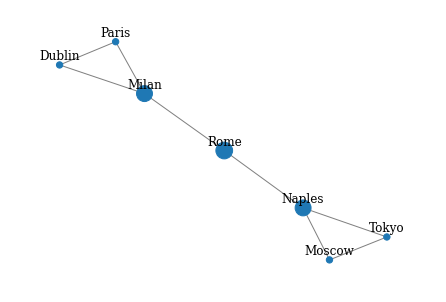

In [ ]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

## Resiliency

Resilience metrics enable us to measure the vulnerability of a graph.

### Assortativity coefficient
Assortativity is used to quantify the tendency of nodes being connected to similar nodes. There are several ways to measure such correlations. One of the most commonly used methods is the Pearson correlation coefficient between the degrees of directly connected nodes (nodes on two opposite ends of a link). The coefficient assumes positive values when there is a correlation between nodes of a similar degree, while it assumes negative values when there is a correlation between nodes of a different degree. Assortativity using the Pearson correlation coefficient is computed in networkx by using the following command:

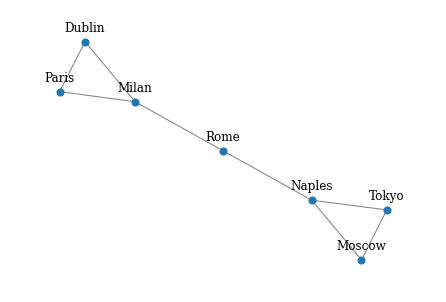

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

draw_graph(G, node_names=nodes)

In [ ]:
nx.degree_pearson_correlation_coefficient(G)

-0.6

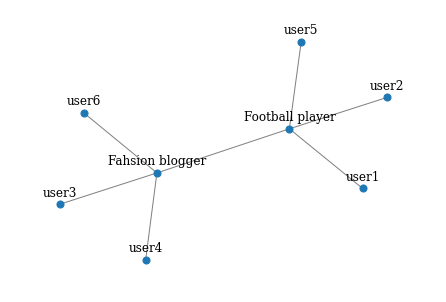

In [ ]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')

In [ ]:
nx.degree_pearson_correlation_coefficient(G)

-0.7500000000000001

Social networks are mostly assortative. However, the so-called influencers (famous singers, football players, fashion bloggers) tend to be followed (incoming edges) by several standard users, while tending to be connected with each other and showing a disassortative behavior.

It is important to remark that these properties are a subset of all the possible metrics used to describe graphs. A wider set of metrics and algorithms can be found at https://networkx.org/documentation/stable/reference/algorithms/.